In [7]:
import csv

import pandas as pd

data = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")

arrest_by_zip = data.groupby('INCIDENTNEIGHBORHOOD')['_id'].nunique()

max_arrests = arrest_by_zip.max()
zip_codes_with_max_arrests = arrest_by_zip[arrest_by_zip == max_arrests].index.tolist()

print("Zip code(s) with the most arrests:")
for zip_code in zip_codes_with_max_arrests:
    print(zip_code)
    
print()

neighborhood_to_search = "Mount Lebanon"  

arrests_in_neighborhood = data[data['INCIDENTNEIGHBORHOOD'] == neighborhood_to_search]

num_arrests_in_neighborhood = arrests_in_neighborhood['_id'].nunique()

print(f"Number of arrests in {neighborhood_to_search}: {num_arrests_in_neighborhood}")

Zip code(s) with the most arrests:
Central Business District

Number of arrests in Mount Lebanon: 0


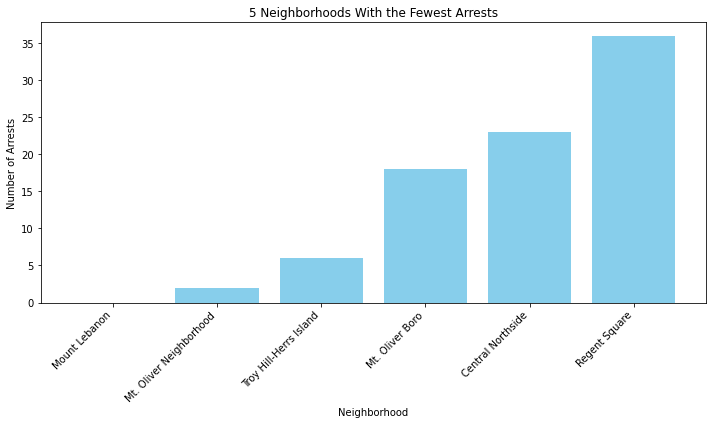

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")

arrest_by_neighborhood = data.groupby('INCIDENTNEIGHBORHOOD')['_id'].nunique()

# Find the neighborhoods with the least arrests (excluding neighborhoods with 0 arrests)
neighborhoods_with_fewest_arrests = arrest_by_neighborhood.nsmallest(5).index.tolist()

# If Mount Lebanon is not in the dataset, hard code it with 0 arrests
if "Mount Lebanon" not in arrest_by_neighborhood:
    arrest_by_neighborhood.loc["Mount Lebanon"] = 0

# Sorting neighborhoods by arrests count
arrest_by_neighborhood = arrest_by_neighborhood.sort_values(ascending=True)

# Bar graph data
labels = ['Mount Lebanon'] + neighborhoods_with_fewest_arrests
values = [arrest_by_neighborhood.loc[label] for label in labels]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.title('5 Neighborhoods With the Fewest Arrests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()
